In [ ]:
# agregate_returns.ipynb
#https://mybinder.org/v2/gh/mmngreco/quantdare_posts/master?filepath=calcular_retornos/agregate_returns.ipynb

In [1]:
# load packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
# not needed, only to prettify the plots.
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

ModuleNotFoundError: No module named 'fix_yahoo_finance'

In [3]:
# prettify the figures
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc('font', family='Times New Roman', size=15)
set_matplotlib_formats('png', 'png', quality=90)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True

kw_save = dict(bbox_iches='tight', transparent=True)

In [ ]:
# asset information
asset_info = '''
Banco do Brasil S.A. (BBAS3.SA)
Sao Paolo - Sao Paolo Delayed Price. Currency in BRL.
Source: https://finance.yahoo.com/quote/BBAS3.SA
'''

In [4]:
# useful functions
# ================
def total_return(prices):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    prices : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return prices.iloc[-1] / prices.iloc[0] - 1


def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1


def plot_this(df, title, figsize=None, ylabel='',
             output_file='imgs/fig.png', bottom_adj=0.25,
             txt_ymin=-0.4, bar=False):
    if bar:
        ax = df.plot.bar(title=title, figsize=figsize)
    else:
        ax = df.plot(title=title, figsize=figsize)
    sns.despine()
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.text(0, txt_ymin, asset_info, transform=ax.transAxes, fontsize=9)
    plt.gcf().subplots_adjust(bottom=bottom_adj)
    plt.savefig(output_file, **kw_save)

In [6]:
# Geting data
# ===========
today = '2017-09-26'  # to make static this script.
tckr = 'BBAS3.SA'  # Banco do Brasil SA
# download data
data = pdr.get_data_yahoo(tckr, "2014-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data = data.asfreq('B')  
data.columns = data.columns.map(lambda col: col.lower())

In [7]:
data.head()  # first values

,high,low,open,close,volume,adj close
Date,,,,,,
2014-01-02,24.480000,23.950001,24.450001,24.000000,4077900.0,17.054821
2014-01-03,24.250000,23.850000,24.020000,24.250000,5094600.0,17.232479
2014-01-06,24.049999,23.610001,24.020000,23.889999,3983200.0,16.976654
2014-01-07,24.100000,23.420000,23.900000,23.480000,4596200.0,16.685305
2014-01-08,23.570000,22.969999,23.500000,23.010000,6737300.0,16.351315


In [8]:
data.tail()  # last values

,high,low,open,close,volume,adj close
Date,,,,,,
2017-09-20,35.130001,34.310001,34.660000,34.759998,12143700.0,31.203842
2017-09-21,35.970001,35.220001,35.400002,35.520000,16532900.0,31.886089
2017-09-22,35.419998,35.020000,35.369999,35.299999,5420100.0,31.688599
2017-09-25,35.740002,34.759998,35.619999,34.799999,5305700.0,31.239752
2017-09-26,35.320000,34.950001,35.160000,35.000000,7647700.0,31.419289


In [9]:
# what about NaNs
data.isnull().sum()

high         45
low          45
open         45
close        45
volume       45
adj close    45
dtype: int64

In [10]:
data.ffill(inplace=True)  # to avoid problems with NaNs.

NameError: name 'asset_info' is not defined

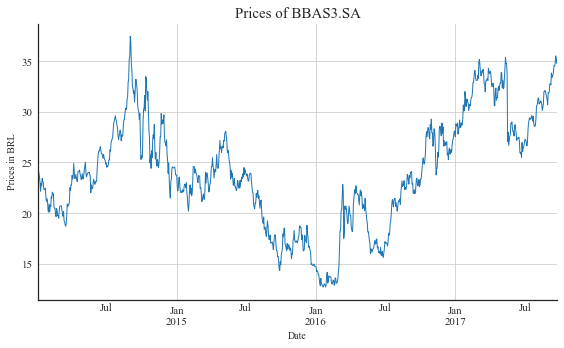

In [11]:
# using close prices
prices = data.close.copy()
# we convert to DataFrame to make easy store more series.
results_storage = prices.to_frame().copy()
# plotting
plot_this(prices, title='Prices of %s' % tckr, ylabel='Prices in BRL',
          txt_ymin=-0.2, bottom_adj=0.15, output_file='imgs/fig_prices.png',)

In [12]:
# extract some date information
results_storage['year'] = prices.index.year
results_storage['month'] = prices.index.month
results_storage['day'] = prices.index.day
results_storage['week_day'] = prices.index.dayofweek
results_storage['week_day_name'] = prices.index.strftime('%A')
results_storage.tail(10)

,close,year,month,day,week_day,week_day_name
Date,,,,,,
2017-09-13,33.590000,2017,9,13,2,Wednesday
2017-09-14,33.619999,2017,9,14,3,Thursday
2017-09-15,34.110001,2017,9,15,4,Friday
2017-09-18,34.580002,2017,9,18,0,Monday
2017-09-19,34.540001,2017,9,19,1,Tuesday
2017-09-20,34.759998,2017,9,20,2,Wednesday
2017-09-21,35.520000,2017,9,21,3,Thursday
2017-09-22,35.299999,2017,9,22,4,Friday
2017-09-25,34.799999,2017,9,25,0,Monday


# Trailing Return

# Approach 1: starting from prices

In [13]:
approach1 = results_storage.groupby(['year', 'month'], )['close'].apply(total_return)
approach1.tail(12)

year  month
2016  10       0.254927
      11       0.020043
      12       0.055222
2017  1        0.129630
      2        0.058861
      3        0.005060
      4       -0.030115
      5       -0.137291
      6       -0.044223
      7        0.056312
      8        0.047782
      9        0.097523
Name: close, dtype: float64

NameError: name 'asset_info' is not defined

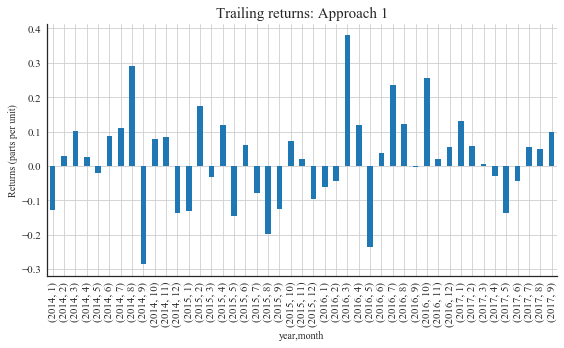

In [14]:
# ploting
# -------
plot_this(approach1, bar=True, title='Trailing returns: Approach 1',
          ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
          output_file='imgs/fig_rets_approach1.png')

In [15]:
select_idx = (2017, 7)
idx_approach1 = results_storage.groupby(['year', 'month'])['close'].groups[select_idx]
last_group = results_storage.loc[idx_approach1]
last_group.head()
last_group.tail()

,close,year,month,day,week_day,week_day_name
Date,,,,,,
2017-07-25,29.559999,2017,7,25,1,Tuesday
2017-07-26,28.840000,2017,7,26,2,Wednesday
2017-07-27,28.590000,2017,7,27,3,Thursday
2017-07-28,28.559999,2017,7,28,4,Friday
2017-07-31,28.700001,2017,7,31,0,Monday


In [16]:
# example of the calculation
total_return(last_group.close), approach1.loc[select_idx]

(0.05631213405775615, 0.05631213405775615)